In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Load dataset
df = pd.read_csv("./elden_ring_weapon.csv")

In [3]:
df.head()

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,...,Any,Phy.1,Mag.1,Fir.1,Lit.1,Hol.1,Bst,Rst,Wgt,Upgrade
0,Academy Glintstone Staff,Glintstone Staff,43,-,-,-,-,100,40,D,...,-,25,15,15,15,15,15,10,3.0,Smithing Stones
1,Alabaster Lord's Sword,Greatsword,313,93,-,-,-,100,126,B,...,-,56,33,27,27,27,39,19,8.0,Somber Smithing Stones
2,Albinauric Bow,Bow,200,-,-,-,-,100,60,E,...,-,-,-,-,-,-,-,-,4.5,Smithing Stones
3,Albinauric Staff,Glintstone Staff,29,-,-,-,-,100,38,D,...,-,23,14,14,14,14,14,9,2.5,Smithing Stones
4,Antspur Rapier,Thrusting Sword,240,-,-,-,-,100,62,D,...,(55),47,31,31,31,31,25,10,3.0,Smithing Stones


In [4]:
df.columns

Index(['Name', 'Type', 'Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Sta', 'Str',
       'Dex', 'Int', 'Fai', 'Arc', 'Any', 'Phy.1', 'Mag.1', 'Fir.1', 'Lit.1',
       'Hol.1', 'Bst', 'Rst', 'Wgt', 'Upgrade'],
      dtype='object')

In [5]:
x = df['Type'].nunique()
x

31

In [6]:
cols = list(df.columns)
cols_damage = cols[2:7]
cols_damage

['Phy', 'Mag', 'Fir', 'Lit', 'Hol']

In [70]:
# Cleaning data by replacing "-" with "0" and then converting all the values to a float value

# Replace "-" with 0 in the column
for i in cols_damage:
    df[i] = df[i].replace('-', '0')
    df[i] = df[i].astype(float)
# Check the data types after conversion
print(df.dtypes)

Name        object
Type        object
Phy        float64
Mag        float64
Fir        float64
Lit        float64
Hol        float64
Cri          int64
Sta          int64
Str         object
Dex         object
Int         object
Fai         object
Arc         object
Any         object
Phy.1       object
Mag.1       object
Fir.1       object
Lit.1       object
Hol.1       object
Bst         object
Rst         object
Wgt        float64
Upgrade     object
dtype: object


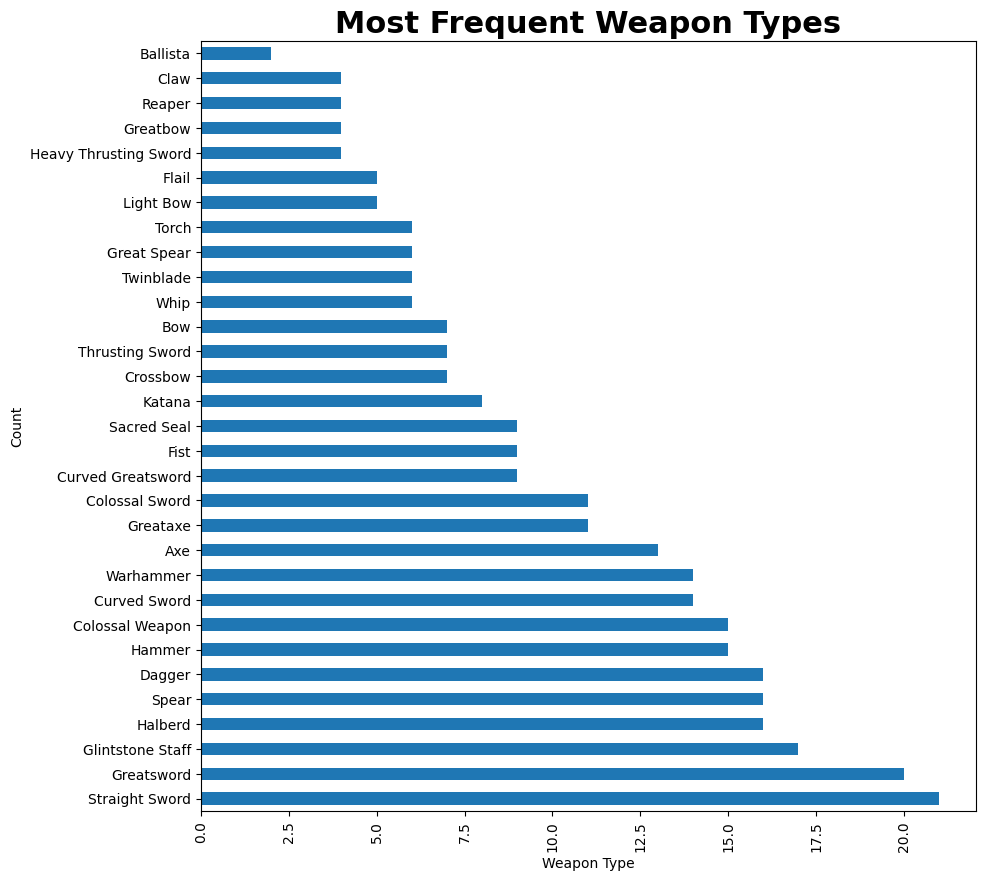

In [71]:
# Count the number of occurrences of each weapon type
weapon_counts = df['Type'].value_counts()

# Plotting
plt.figure(figsize=(10, 10))  # Set the figure size
weapon_counts.plot(kind='barh')  # Create a bar plot
plt.xlabel('Weapon Type')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Most Frequent Weapon Types', size=22, weight="bold")  # Set the plot title
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()  # Show the plot


In [8]:
# Calculate average damage for each weapon type
average_damage = df.groupby('Type')[['Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Any']].mean()
#Alternate use: import statistics as st
#st.mean, st.median

# Find the weapon type with the highest average damage
weapon_type_with_highest_avg_damage = average_damage.mean(axis=1).idxmax()

weapon_type_with_lowest_avg_damage = average_damage.mean(axis=1).idxmin()

# Print the result
print("Weapon type with the highest average damage:", weapon_type_with_highest_avg_damage)
print("Weapon type with the lowest average damage:", weapon_type_with_lowest_avg_damage)


Weapon type with the highest average damage: Dagger
Weapon type with the lowest average damage: Ballista


C:\Users\nikit\AppData\Local\Temp\ipykernel_21948\4045797745.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_damage = df.groupby('Type')[['Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Any']].mean()


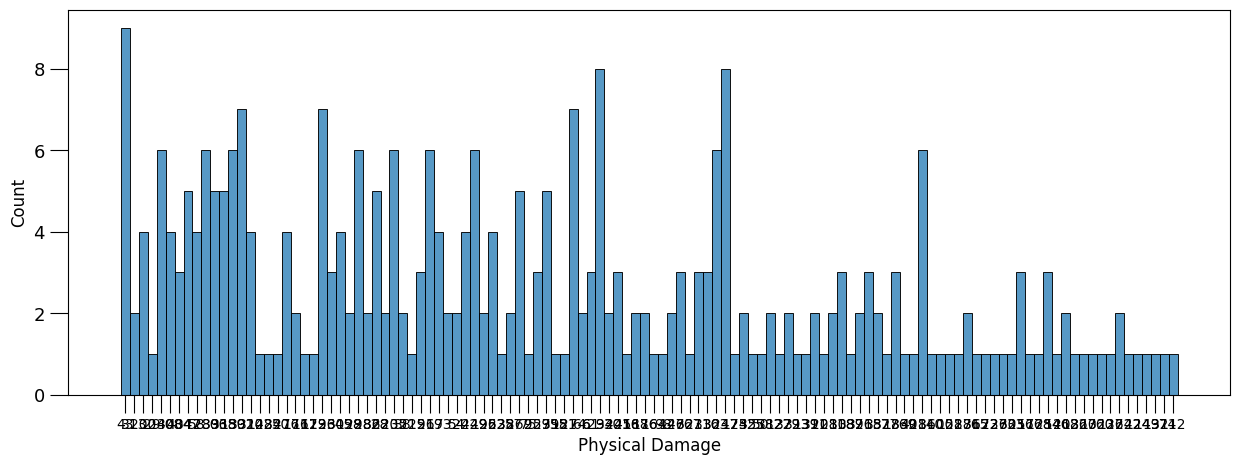

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Phy');
plt.ylabel("Count", size = 12)
plt.xlabel("Physical Damage", size = 12)
plt.yticks(size=13)
plt.tick_params(size=13)

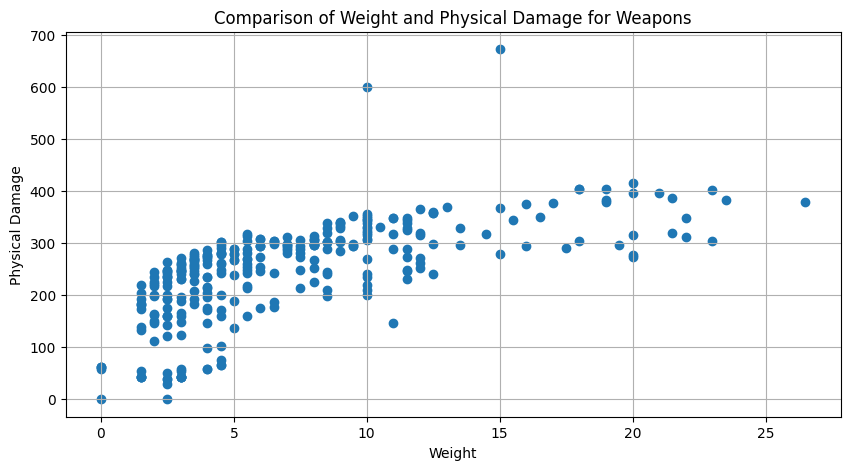

In [74]:
# Sort the data by physical damage in descending order
sorted_data = df.sort_values(by='Phy', ascending=False)

# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(df['Wgt'], df['Phy'])  # Create the scatter plot
plt.xlabel('Weight')  # Set the x-axis label
plt.ylabel('Physical Damage')  # Set the y-axis label
plt.title('Comparison of Weight and Physical Damage for Weapons')  # Set the plot title
plt.grid(True)  # Add gridlines
plt.show()  # Show the plot

In [21]:
# Find the row with the highest physical damage
maximum_phy=int(df['Phy'].max())
max_damage_row = df.loc[maximum_phy]
# Find the row with the highest Holy damage
# min_damage_row = df.iloc[df['Hol'].idxmax()]

In [22]:
# Print 
print("Row with the highest physical damage:")
print(max_damage_row["Name"])

Row with the highest physical damage:
Forked Greatsword


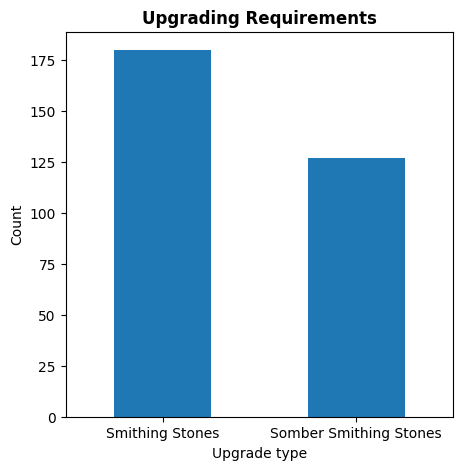

In [23]:
# Count the number of occurrences of each weapon type
weapon_counts = df['Upgrade'].value_counts()

# Plotting
plt.figure(figsize=(5, 5))  # Set the figure size
weapon_counts.plot(kind='bar', width = 0.5)  # Create a bar plot
plt.xlabel('Upgrade type')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Upgrading Requirements', size=12, weight="bold")  # Set the plot title
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
plt.show()  # Show the plot